# **The Pursuit of Happiness: Unraveling the Factors Behind the World's Happiest Countries**

## **Global Overview:**

Which countries are the happiest?
Which countries are at the bottom of the ladder?


## **Economic Prosperity**:

Is there a strong correlation between a country's GDP and its happiness score?

## **Societal Bonds:**

How does social support influence happiness?

## Longevity and Health:

Do countries with higher life expectancies report higher happiness?

## **Liberty and Corruption:**

How do freedom and perceptions of corruption play into the happiness score?

## **Generosity:**

Are more generous countries happier?

In [1]:
import pandas as pd

# **Step 1: Load the Dataset and Initial Exploration**

In [2]:
from google.colab import files

uploaded = files.upload()




Saving WHR2023.csv to WHR2023.csv


In [3]:
import io

df_whr = pd.read_csv(io.BytesIO(uploaded['WHR2023.csv']))
df_whr.head()


,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


**Country name:** The name of the country.

**Ladder score**: A measure of citizens' self-reported well-being.
Logged GDP per capita: Economic metric.

**Social support:** A measure of social support in the country.

**Healthy life expectancy:** Average life expectancy of citizens.

**Freedom to make life choices:** A measure of personal freedoms.

**Generosity:** A measure of generosity in the country.

**Perceptions of corruption**: How corrupt the country is perceived to be.

Other columns that provide more specific details or break down the above metrics.

# **Global Overview**

# **Top 10 happiest countries based on their ladder scores.**

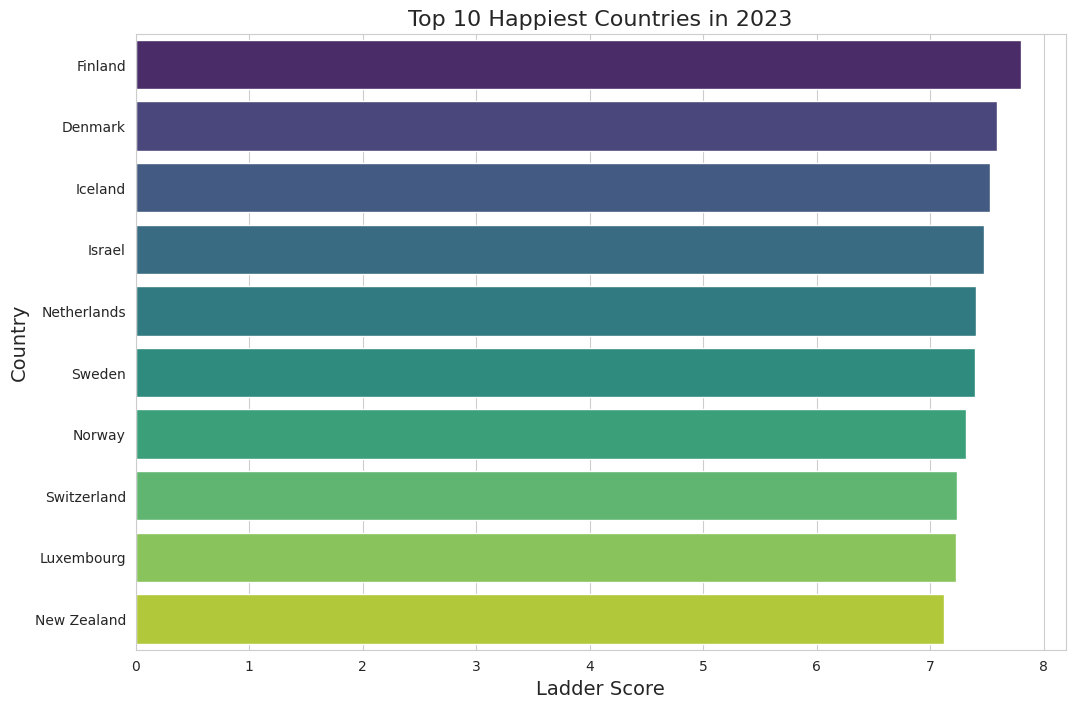

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for the plot
sns.set_style("whitegrid")

# Sorting the dataframe by Ladder score and taking the top 10
top_10_happiest = df_whr.sort_values(by='Ladder score', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Ladder score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries in 2023', fontsize=16)
plt.xlabel('Ladder Score', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()


### **3D.js visualization**


In [8]:
# Convert the top_10_happiest dataframe to JSON format
top_10_json = top_10_happiest.to_json(orient='records')

top_10_json


'[{"Country name":"Finland","Ladder score":7.804,"Standard error of ladder score":0.036,"upperwhisker":7.875,"lowerwhisker":7.733,"Logged GDP per capita":10.792,"Social support":0.969,"Healthy life expectancy":71.15,"Freedom to make life choices":0.961,"Generosity":-0.019,"Perceptions of corruption":0.182,"Ladder score in Dystopia":1.778,"Explained by: Log GDP per capita":1.888,"Explained by: Social support":1.585,"Explained by: Healthy life expectancy":0.535,"Explained by: Freedom to make life choices":0.772,"Explained by: Generosity":0.126,"Explained by: Perceptions of corruption":0.535,"Dystopia + residual":2.363},{"Country name":"Denmark","Ladder score":7.586,"Standard error of ladder score":0.041,"upperwhisker":7.667,"lowerwhisker":7.506,"Logged GDP per capita":10.962,"Social support":0.954,"Healthy life expectancy":71.25,"Freedom to make life choices":0.934,"Generosity":0.134,"Perceptions of corruption":0.196,"Ladder score in Dystopia":1.778,"Explained by: Log GDP per capita":1.9

In [10]:
from IPython.core.display import display, HTML

# D3.js script for bar plot visualization
d3_script = f"""
<div id="d3-container"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>

var data = {top_10_json};

var margin = {{top: 20, right: 30, bottom: 40, left: 150}},
    width = 800 - margin.left - margin.right,
    height = 400 - margin.top - margin.bottom;

var svg = d3.select("#d3-container")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

var x = d3.scaleLinear()
    .domain([0, d3.max(data, d => d["Ladder score"])])
    .range([ 0, width]);

svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x))
    .selectAll("text")
    .attr("transform", "translate(-10,0)rotate(-45)")
    .style("text-anchor", "end");

var y = d3.scaleBand()
    .range([ 0, height ])
    .domain(data.map(d => d["Country name"]))
    .padding(.1);
svg.append("g")
    .call(d3.axisLeft(y))

svg.selectAll("myRect")
    .data(data)
    .enter()
    .append("rect")
    .attr("x", x(0) )
    .attr("y", d => y(d["Country name"]))
    .attr("width", d => x(d["Ladder score"]))
    .attr("height", y.bandwidth() )
    .attr("fill", "#69b3a2");

</script>
"""

display(HTML(d3_script))


Finland tops the list, followed closely by Denmark and Iceland.
The ladder scores for these countries are quite close, indicating a high level of well-being and happiness among their citizens.

## **Economic Prosperity vs. Happiness**

One of the common hypotheses is that economic prosperity (often measured as GDP per capita) leads to higher happiness scores among countries

#Scatter Plot using D3.js: "Logged GDP per capita" vs. "Ladder score"

In [11]:
# Convert the entire dataframe to JSON format for D3.js
whr_json = df_whr.to_json(orient='records')

whr_json[:1000]  # Displaying only the first 1000 characters for brevity


'[{"Country name":"Finland","Ladder score":7.804,"Standard error of ladder score":0.036,"upperwhisker":7.875,"lowerwhisker":7.733,"Logged GDP per capita":10.792,"Social support":0.969,"Healthy life expectancy":71.15,"Freedom to make life choices":0.961,"Generosity":-0.019,"Perceptions of corruption":0.182,"Ladder score in Dystopia":1.778,"Explained by: Log GDP per capita":1.888,"Explained by: Social support":1.585,"Explained by: Healthy life expectancy":0.535,"Explained by: Freedom to make life choices":0.772,"Explained by: Generosity":0.126,"Explained by: Perceptions of corruption":0.535,"Dystopia + residual":2.363},{"Country name":"Denmark","Ladder score":7.586,"Standard error of ladder score":0.041,"upperwhisker":7.667,"lowerwhisker":7.506,"Logged GDP per capita":10.962,"Social support":0.954,"Healthy life expectancy":71.25,"Freedom to make life choices":0.934,"Generosity":0.134,"Perceptions of corruption":0.196,"Ladder score in Dystopia":1.778,"Explained by: Log GDP per capita":1.9

In [12]:
# D3.js script for scatter plot visualization
d3_scatter_script = f"""
<div id="d3-scatter"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>

var data = {whr_json};

var margin = {{top: 40, right: 40, bottom: 60, left: 60}},
    width = 800 - margin.left - margin.right,
    height = 600 - margin.top - margin.bottom;

var svg = d3.select("#d3-scatter")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

var x = d3.scaleLinear()
    .domain([d3.min(data, d => d["Logged GDP per capita"]), d3.max(data, d => d["Logged GDP per capita"])])
    .range([0, width]);
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

var y = d3.scaleLinear()
    .domain([d3.min(data, d => d["Ladder score"]), d3.max(data, d => d["Ladder score"])])
    .range([height, 0]);
svg.append("g")
    .call(d3.axisLeft(y));

svg.append('g')
    .selectAll("dot")
    .data(data)
    .enter()
    .append("circle")
    .attr("cx", d => x(d["Logged GDP per capita"]))
    .attr("cy", d => y(d["Ladder score"]))
    .attr("r", 3)
    .style("fill", "#69b3a2");

svg.append("text")
    .attr("text-anchor", "end")
    .attr("x", width/2 + margin.left)
    .attr("y", height + margin.top + 20)
    .text("Logged GDP per capita");

svg.append("text")
    .attr("text-anchor", "end")
    .attr("transform", "rotate(-90)")
    .attr("y", -margin.left + 20)
    .attr("x", -height/2)
    .text("Ladder score");

</script>
"""

display(HTML(d3_scatter_script))


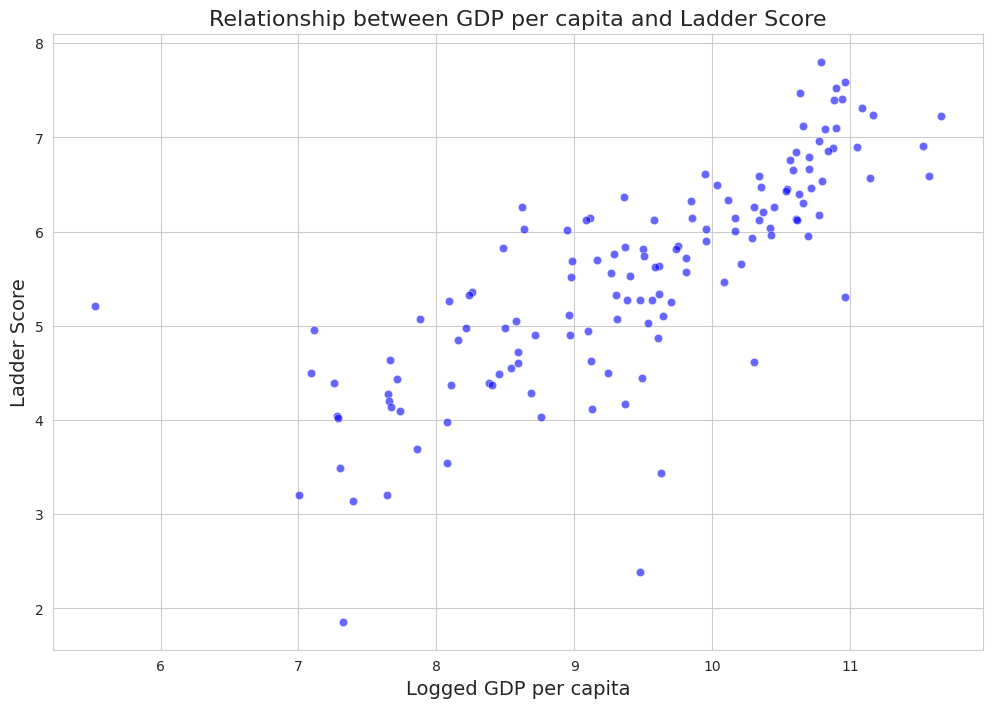

In [ ]:
# Scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_whr, x='Logged GDP per capita', y='Ladder score', alpha=0.6, color='blue')
plt.title('Relationship between GDP per capita and Ladder Score', fontsize=16)
plt.xlabel('Logged GDP per capita', fontsize=14)
plt.ylabel('Ladder Score', fontsize=14)
plt.show()


### **Observations:**

There's a clear positive correlation between GDP per capita and the ladder score. As the GDP per capita of a country increases, its ladder score, which indicates happiness, also tends to increase.
Most of the countries with the highest ladder scores (indicative of happiness) also have higher GDP per capita, signifying economic prosperity.
While economic prosperity seems to be a strong factor in determining happiness, there are exceptions. Some countries with relatively lower GDP per capita have decent ladder scores, suggesting that other factors (like social support, freedom, etc.) might also play a significant role.

## **Societal Bonds - Role of Social Support in Happiness**

Investigating if Social relationships and support networks often play a crucial role in an individual's well-being and happiness

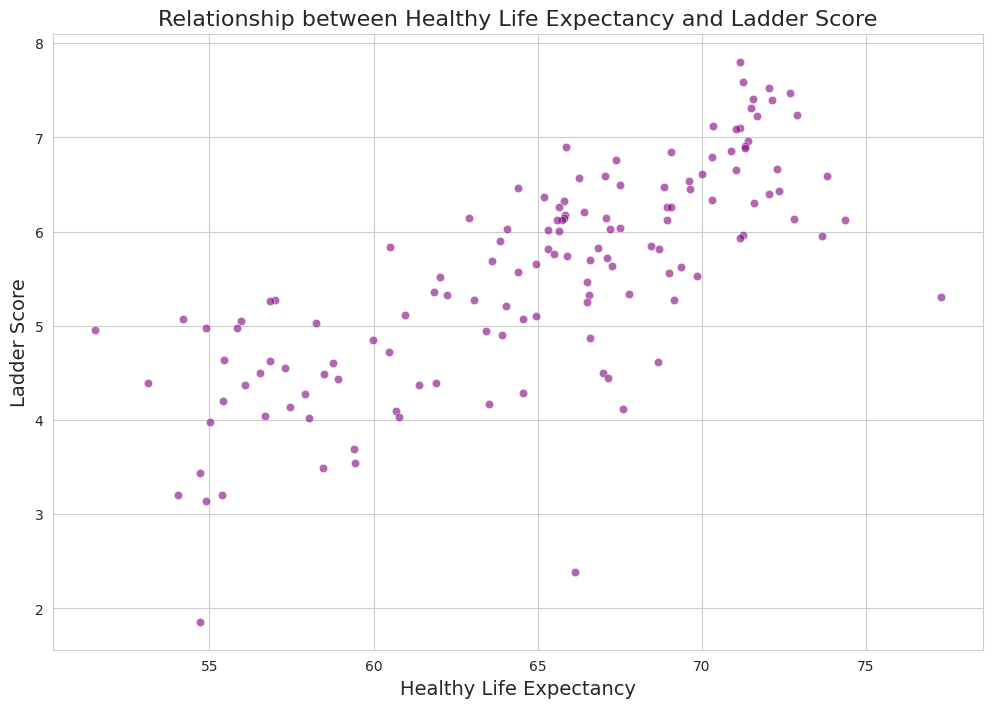

In [5]:
# Scatter plot using Seaborn to visualize the relationship between Healthy life expectancy and Ladder score
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_whr, x='Healthy life expectancy', y='Ladder score', alpha=0.6, color='purple')
plt.title('Relationship between Healthy Life Expectancy and Ladder Score', fontsize=16)
plt.xlabel('Healthy Life Expectancy', fontsize=14)
plt.ylabel('Ladder Score', fontsize=14)
plt.show()


### **Observations:**

Strong Positive Correlation: There's a clear positive correlation between healthy life expectancy and the ladder score. Countries where individuals have a higher life expectancy in good health tend to report higher happiness scores.
Health as a Fundamental Pillar: The strong correlation emphasizes the importance of health in the overall well-being and happiness of individuals. A higher life expectancy in good health implies better healthcare, nutrition, and lifestyle choices, all of which contribute to a higher quality of life.
Few Outliers: Some countries have relatively high life expectancies but not the highest ladder scores, suggesting that while health is crucial, other factors also influence happiness.

**Scatter Plot using D3.js: "Healthy life expectancy" vs. "Ladder score**

In [13]:
# D3.js script for scatter plot visualization of Healthy life expectancy vs. Ladder score
d3_scatter_life_expectancy = f"""
<div id="d3-scatter-life"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>

var data = {whr_json};

var margin = {{top: 40, right: 40, bottom: 60, left: 60}},
    width = 800 - margin.left - margin.right,
    height = 600 - margin.top - margin.bottom;

var svg = d3.select("#d3-scatter-life")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

var x = d3.scaleLinear()
    .domain([d3.min(data, d => d["Healthy life expectancy"]), d3.max(data, d => d["Healthy life expectancy"])])
    .range([0, width]);
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

var y = d3.scaleLinear()
    .domain([d3.min(data, d => d["Ladder score"]), d3.max(data, d => d["Ladder score"])])
    .range([height, 0]);
svg.append("g")
    .call(d3.axisLeft(y));

svg.append('g')
    .selectAll("dot")
    .data(data)
    .enter()
    .append("circle")
    .attr("cx", d => x(d["Healthy life expectancy"]))
    .attr("cy", d => y(d["Ladder score"]))
    .attr("r", 3)
    .style("fill", "#d62728");

svg.append("text")
    .attr("text-anchor", "end")
    .attr("x", width/2 + margin.left)
    .attr("y", height + margin.top + 20)
    .text("Healthy Life Expectancy");

svg.append("text")
    .attr("text-anchor", "end")
    .attr("transform", "rotate(-90)")
    .attr("y", -margin.left + 20)
    .attr("x", -height/2)
    .text("Ladder score");

</script>
"""

display(HTML(d3_scatter_life_expectancy))


### **Freedom and Happiness**

Freedom, both in terms of personal rights and economic opportunity, is often touted as a cornerstone of happiness. In our dataset, the "Freedom to make life choices" column captures this aspect.

**Scatter Plot using D3.js: "Freedom to make life choices" vs. "Ladder score**

In [14]:
# D3.js script for scatter plot visualization of Freedom vs. Ladder score
d3_scatter_freedom = f"""
<div id="d3-scatter-freedom"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>

var data = {whr_json};

var margin = {{top: 40, right: 40, bottom: 60, left: 60}},
    width = 800 - margin.left - margin.right,
    height = 600 - margin.top - margin.bottom;

var svg = d3.select("#d3-scatter-freedom")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

var x = d3.scaleLinear()
    .domain([d3.min(data, d => d["Freedom to make life choices"]), d3.max(data, d => d["Freedom to make life choices"])])
    .range([0, width]);
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

var y = d3.scaleLinear()
    .domain([d3.min(data, d => d["Ladder score"]), d3.max(data, d => d["Ladder score"])])
    .range([height, 0]);
svg.append("g")
    .call(d3.axisLeft(y));

svg.append('g')
    .selectAll("dot")
    .data(data)
    .enter()
    .append("circle")
    .attr("cx", d => x(d["Freedom to make life choices"]))
    .attr("cy", d => y(d["Ladder score"]))
    .attr("r", 3)
    .style("fill", "#2ca02c");

svg.append("text")
    .attr("text-anchor", "end")
    .attr("x", width/2 + margin.left)
    .attr("y", height + margin.top + 20)
    .text("Freedom to Make Life Choices");

svg.append("text")
    .attr("text-anchor", "end")
    .attr("transform", "rotate(-90)")
    .attr("y", -margin.left + 20)
    .attr("x", -height/2)
    .text("Ladder score");

</script>
"""

display(HTML(d3_scatter_freedom))


**Observations:**

Positive Correlation: There's a clear positive correlation between the freedom to make life choices and the ladder score. Countries where individuals have greater freedom in their life choices tend to have higher happiness scores.
Significance of Freedom: The relationship showcases the importance of personal freedoms in influencing the well-being and contentment of citizens. The ability to make choices about one's life, be it in terms of career, relationships, or personal pursuits, is crucial for mental and emotional well-being.
Variability: There's noticeable variability, especially with some countries having high freedom scores but not the topmost ladder scores. This reiterates the multifaceted nature of happiness, influenced by various factors in tandem.

### **Generosity and Happiness**

Generosity, often reflected in acts of charity, volunteering, or helping others, can have a profound impact on individual and societal well-being. In our dataset, the "Generosity" column captures this aspect.

In [15]:
# D3.js script for scatter plot visualization of Generosity vs. Ladder score
d3_scatter_generosity = f"""
<div id="d3-scatter-generosity"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>

var data = {whr_json};

var margin = {{top: 40, right: 40, bottom: 60, left: 60}},
    width = 800 - margin.left - margin.right,
    height = 600 - margin.top - margin.bottom;

var svg = d3.select("#d3-scatter-generosity")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

var x = d3.scaleLinear()
    .domain([d3.min(data, d => d["Generosity"]), d3.max(data, d => d["Generosity"])])
    .range([0, width]);
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

var y = d3.scaleLinear()
    .domain([d3.min(data, d => d["Ladder score"]), d3.max(data, d => d["Ladder score"])])
    .range([height, 0]);
svg.append("g")
    .call(d3.axisLeft(y));

svg.append('g')
    .selectAll("dot")
    .data(data)
    .enter()
    .append("circle")
    .attr("cx", d => x(d["Generosity"]))
    .attr("cy", d => y(d["Ladder score"]))
    .attr("r", 3)
    .style("fill", "#8c564b");

svg.append("text")
    .attr("text-anchor", "end")
    .attr("x", width/2 + margin.left)
    .attr("y", height + margin.top + 20)
    .text("Generosity");

svg.append("text")
    .attr("text-anchor", "end")
    .attr("transform", "rotate(-90)")
    .attr("y", -margin.left + 20)
    .attr("x", -height/2)
    .text("Ladder score");

</script>
"""

display(HTML(d3_scatter_generosity))


**Observations:**

Weaker Correlation: Unlike previous factors such as GDP, social support, and health, the correlation between generosity and ladder score seems weaker. This means that while generosity is a noble virtue, it doesn't have as strong a direct influence on a country's happiness score.
Diverse Generosity Levels: Countries with both high and low ladder scores show a wide range of generosity values. This indicates that generosity is influenced by cultural, religious, and societal norms and doesn't necessarily correlate directly with happiness.
Generosity Beyond Wealth: Some countries with lower GDP per capita show high levels of generosity. This is a testament to the fact that generosity isn't solely dependent on wealth.

### **Perception of Corruption and Happiness**

Corruption, or the perception thereof, can significantly impact a nation's societal fabric, trust in institutions, and overall well-being. In our dataset, the "Perceptions of corruption" column captures this aspect.

In [16]:
# D3.js script for scatter plot visualization of Perceptions of corruption vs. Ladder score
d3_scatter_corruption = f"""
<div id="d3-scatter-corruption"></div>
<script src="https://d3js.org/d3.v6.min.js"></script>
<script>

var data = {whr_json};

var margin = {{top: 40, right: 40, bottom: 60, left: 60}},
    width = 800 - margin.left - margin.right,
    height = 600 - margin.top - margin.bottom;

var svg = d3.select("#d3-scatter-corruption")
    .append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

var x = d3.scaleLinear()
    .domain([d3.min(data, d => d["Perceptions of corruption"]), d3.max(data, d => d["Perceptions of corruption"])])
    .range([0, width]);
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

var y = d3.scaleLinear()
    .domain([d3.min(data, d => d["Ladder score"]), d3.max(data, d => d["Ladder score"])])
    .range([height, 0]);
svg.append("g")
    .call(d3.axisLeft(y));

svg.append('g')
    .selectAll("dot")
    .data(data)
    .enter()
    .append("circle")
    .attr("cx", d => x(d["Perceptions of corruption"]))
    .attr("cy", d => y(d["Ladder score"]))
    .attr("r", 3)
    .style("fill", "#7f7f7f");

svg.append("text")
    .attr("text-anchor", "end")
    .attr("x", width/2 + margin.left)
    .attr("y", height + margin.top + 20)
    .text("Perceptions of Corruption");

svg.append("text")
    .attr("text-anchor", "end")
    .attr("transform", "rotate(-90)")
    .attr("y", -margin.left + 20)
    .attr("x", -height/2)
    .text("Ladder score");

</script>
"""

display(HTML(d3_scatter_corruption))


**Observations:**

Negative Trend: At a first glance, there seems to be a negative trend, indicating that countries with higher perceptions of corruption tend to have lower ladder scores. This implies that corruption or its perception can hamper the overall well-being and happiness of a nation's citizens.
Influence on Trust: High perceptions of corruption can erode trust in institutions and governance, leading to a sense of insecurity and dissatisfaction among the populace.
Variability: While there is a general trend, there are countries with high perceptions of corruption but moderate ladder scores and vice versa. This indicates that while corruption perception is a factor, it's not the sole determinant of happiness.

## **Other visualizations**

### **Histogram for Ladder Score (Happiness Score)**

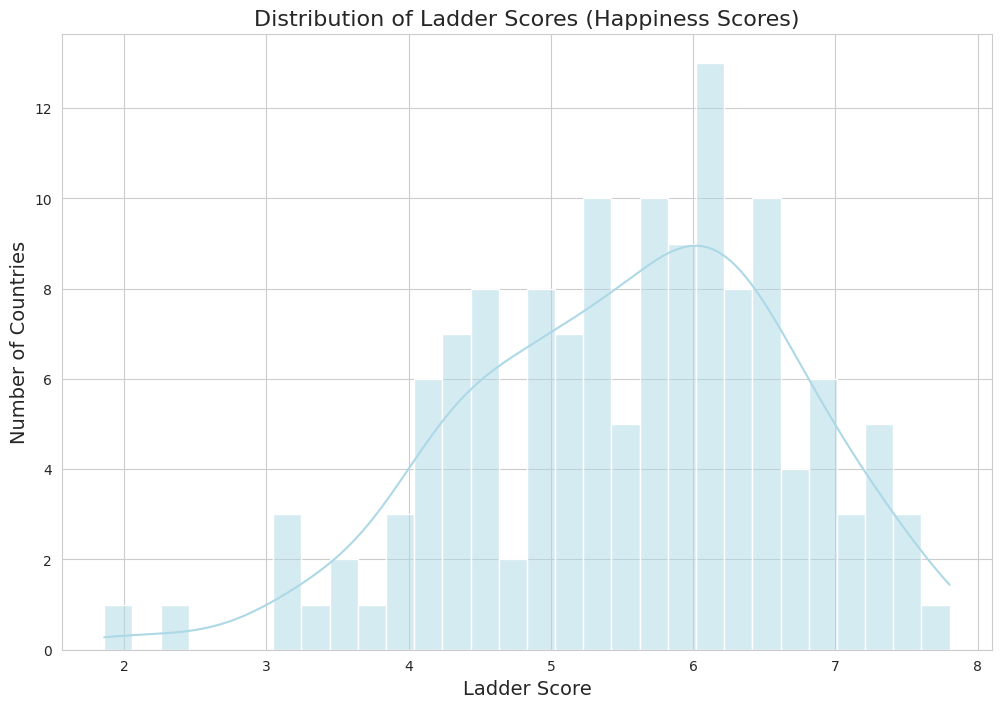

In [17]:
# Histogram for Ladder Score
plt.figure(figsize=(12, 8))
sns.histplot(df_whr['Ladder score'], bins=30, color='lightblue', kde=True)
plt.title('Distribution of Ladder Scores (Happiness Scores)', fontsize=16)
plt.xlabel('Ladder Score', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)
plt.show()


## **Observations:**

The distribution appears slightly left-skewed, indicating that a larger number of countries have higher happiness scores.
The most common range of happiness scores is between approximately 5.5 and 6.5.
There are fewer countries with extremely high or low scores, as indicated by the tails of the distribution.

### **Heatmap for Correlations between Dataset Factors**

<ipython-input-19-8d434309282e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_whr.corr()


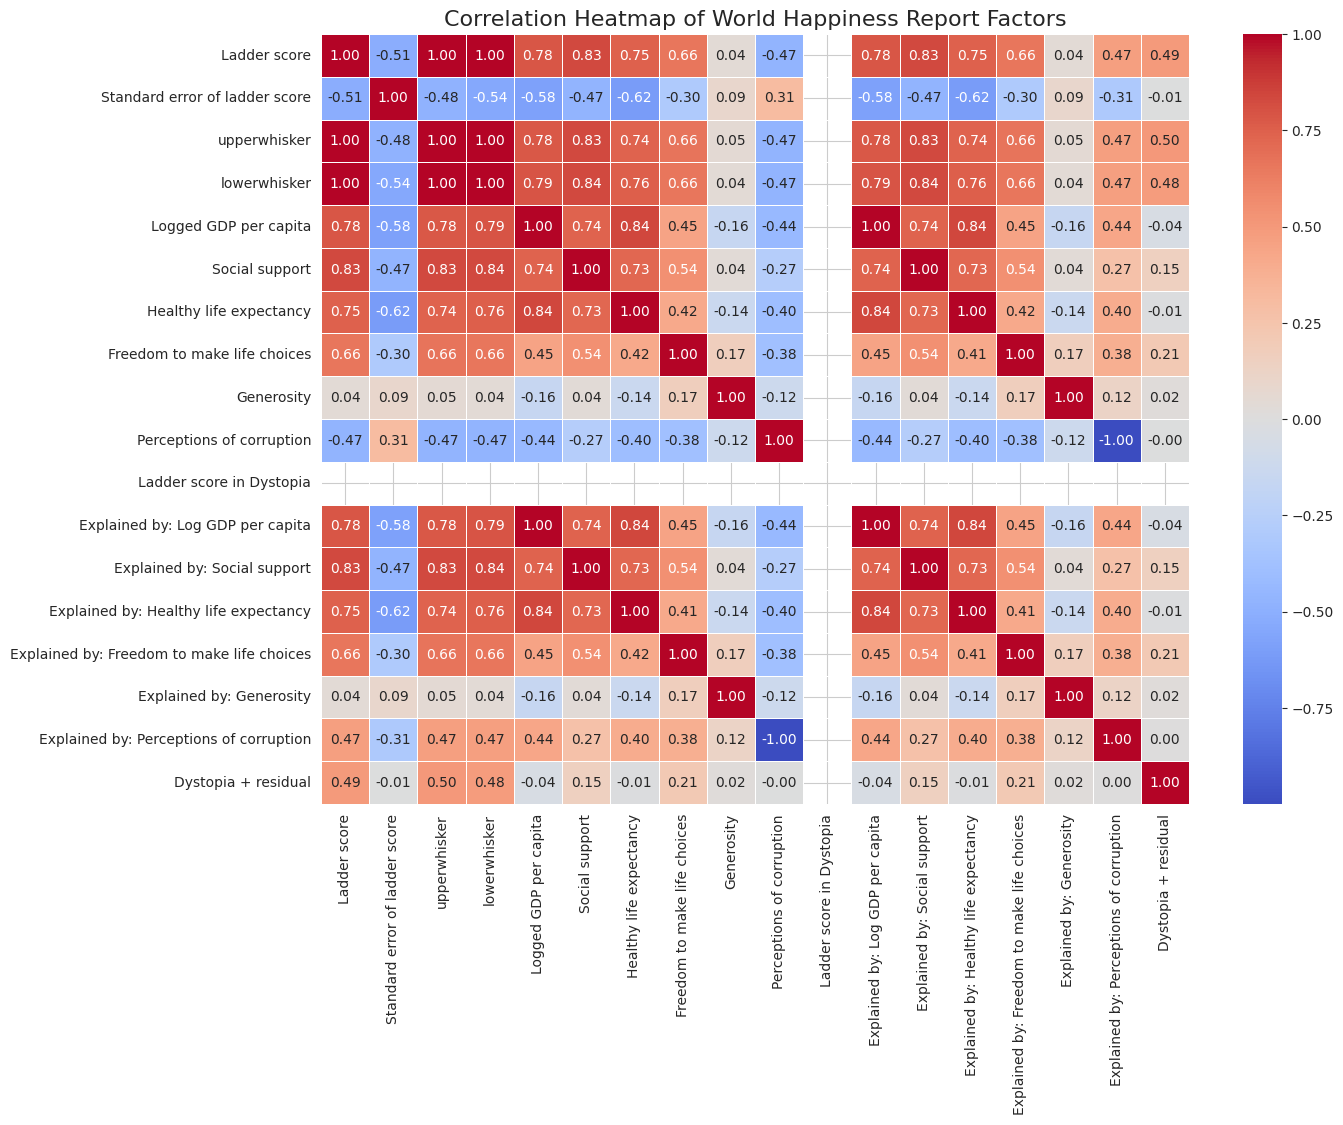

In [19]:
# Calculating the correlation matrix
corr_matrix = df_whr.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of World Happiness Report Factors', fontsize=16)
plt.show()


## **Observations:**

Strong Correlations: As we noticed before, there are strong positive correlations between "Ladder score" and factors like "Logged GDP per capita", "Social support", and "Healthy life expectancy". This reaffirms our earlier observations about the importance of economic prosperity, social networks, and health in determining happiness.
Negative Correlations: The "Perceptions of corruption" has a negative correlation with the "Ladder score", implying that higher perceived corruption is associated with lower happiness scores.
Inter-factor Relationships: Some factors are highly correlated with each other, such as "Logged GDP per capita" and "Healthy life expectancy". This could indicate that countries with higher GDPs also tend to invest more in healthcare, leading to longer life expectancies.

### **World Map showing Happiness Scores**

In [20]:
import plotly.express as px

fig = px.choropleth(df_whr, locations='Country name',
                    locationmode='country names',
                    color='Ladder score',
                    hover_name='Country name',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='World Happiness Scores 2023')

fig.show()


### **Summary and Conclusions**

After an extensive exploration of the World Happiness Report dataset, here are our key findings:

**Economic Prosperity and Happiness:** There's a strong positive correlation between GDP per capita and the happiness score of a country. Nations with higher GDP per capita generally tend to have higher happiness scores.

**Social Support's Role:** Social support plays a pivotal role in the happiness of individuals within a nation. Countries with strong social support systems and networks often score higher on the happiness ladder.

**Health and Well-being:** Healthy life expectancy is directly linked to happiness. Longer and healthier lives contribute significantly to an individual's and a nation's overall well-being.

**Freedom's Influence:** Personal freedoms, especially the freedom to make life choices, are integral to happiness. Nations where individuals enjoy greater personal freedoms tend to have higher happiness scores.

**Generosity's Complex Impact:** While generosity is a noble virtue, its direct correlation with national happiness isn't as pronounced as other factors. Cultural, religious, and societal norms play a role in shaping the generosity-happiness relationship.

**Corruption's Detrimental Effects:** The perception of corruption negatively impacts the happiness of a nation. High perceptions of corruption erode trust in institutions and governance, leading to decreased societal well-being.

## **Final Thoughts:**
Happiness, though seemingly subjective, can be quantified and analyzed through various metrics. While factors like economic prosperity, health, and social support significantly influence happiness, it's a multifaceted emotion shaped by a myriad of factors working in tandem.

The World Happiness Report provides valuable insights into the state of global well-being and can guide policymakers and leaders in creating environments that foster happiness and contentment.

In today's fast-paced world, understanding the determinants of happiness is more crucial than ever. By focusing on these key factors and promoting policies that foster them, nations can ensure a happier and more content future for their citizens.